<a href="https://colab.research.google.com/github/raonishitha22/Natural-gas-price-prediction/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.8 which is incompatible.


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
df=pd.read_csv('DATA SET.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6384 non-null   object 
 1   natural_gas_price  6383 non-null   float64
 2   crude_oil_price    6383 non-null   float64
dtypes: float64(2), object(1)
memory usage: 149.8+ KB


In [ ]:
df.head(10)

,Date,natural_gas_price,crude_oil_price
0,07-01-1997,3.82,26.25
1,08-01-1997,3.80,26.55
2,09-01-1997,3.61,26.30
3,10-01-1997,3.92,26.15
4,13-01-1997,4.00,25.20
5,14-01-1997,4.01,25.10
6,15-01-1997,4.34,25.95
7,16-01-1997,4.71,25.45
8,17-01-1997,3.91,25.40
9,20-01-1997,3.26,25.10


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.columns=["ds","y"]

In [ ]:
df["ds"]=pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1997-07-01,3.82
1,1997-08-01,3.80
2,1997-09-01,3.61
3,1997-10-01,3.92
4,1997-01-13,4.00


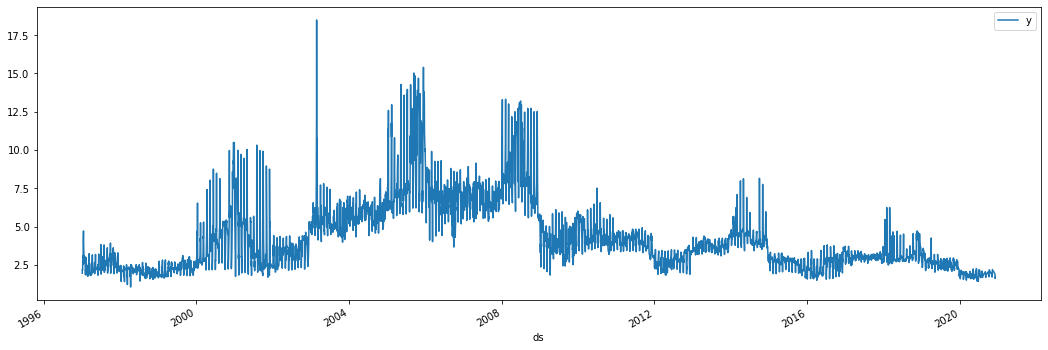

In [ ]:
df.plot(x="ds",y="y",figsize=(18,6))

In [ ]:
train =df.iloc[:len(df)-365]
test =df.iloc[len(df)-365:]

In [ ]:
m=Prophet()
m.fit(train)
future= m.make_future_dataframe(periods=365)
forecast =m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5933,2020-11-27,2.469824,0.756957,3.920918,1.823885,3.064188,-0.034819,-0.034819,-0.034819,-0.037182,-0.037182,-0.037182,0.002363,0.002363,0.002363,0.0,0.0,0.0,2.435005
5934,2020-11-28,2.469437,0.846168,4.176972,1.815097,3.065942,0.033810,0.033810,0.033810,0.013435,0.013435,0.013435,0.020375,0.020375,0.020375,0.0,0.0,0.0,2.503247
5935,2020-11-29,2.469050,0.750074,4.256532,1.808262,3.067697,0.006207,0.006207,0.006207,-0.034307,-0.034307,-0.034307,0.040514,0.040514,0.040514,0.0,0.0,0.0,2.475257
5936,2020-11-30,2.468664,0.736431,4.311763,1.804920,3.069451,0.041408,0.041408,0.041408,-0.021128,-0.021128,-0.021128,0.062536,0.062536,0.062536,0.0,0.0,0.0,2.510071
5937,2020-12-01,2.468277,0.789392,4.301926,1.801915,3.071205,0.120997,0.120997,0.120997,0.034849,0.034849,0.034849,0.086148,0.086148,0.086148,0.0,0.0,0.0,2.589274


In [ ]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(20)

,ds,yhat,yhat_lower,yhat_upper
5918,2020-11-12,2.526626,0.911992,4.284085
5919,2020-11-13,2.431680,0.709839,4.074063
5920,2020-11-14,2.471149,0.730182,4.071335
5921,2020-11-15,2.413140,0.601127,4.052728
5922,2020-11-16,2.417196,0.690460,3.969334
5923,2020-11-17,2.465452,0.774559,4.198107
5924,2020-11-18,2.422870,0.751795,4.033951
5925,2020-11-19,2.466334,0.766218,4.155441
5926,2020-11-20,2.381056,0.708108,4.059380
5927,2020-11-21,2.431840,0.710574,4.011837


In [ ]:
test.tail(20)

,ds,y
5918,2020-07-15,1.76
5919,2020-07-16,1.79
5920,2020-07-17,1.79
5921,2020-07-20,1.71
5922,2020-07-21,1.66
5923,2020-07-22,1.69
5924,2020-07-23,1.75
5925,2020-07-24,1.77
5926,2020-07-27,1.85
5927,2020-07-28,1.83


In [ ]:
plot_plotly(m,forecast)

In [ ]:
plot_components_plotly(m,forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-365:]["yhat"]

In [ ]:
print("Root Mean Squared Error between actual and predicted values:",rmse(predictions,test["y"]))
print("Mean Value of Test Dataset:",test["y"].mean())

Root Mean Squared Error between actual and predicted values: 0.46294280780893354
Mean Value of Test Dataset: 2.1910684931506847


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 39 forecasts with cutoffs between 2000-03-11 00:00:00 and 2018-12-02 00:00:00


  0%|          | 0/39 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2000-03-13,2.938737,2.352293,3.492485,2.79,2000-03-11
1,2000-03-14,2.972873,2.421203,3.547114,2.83,2000-03-11
2,2000-03-15,2.976907,2.376459,3.544823,2.76,2000-03-11
3,2000-03-16,2.948398,2.388341,3.466055,2.84,2000-03-11
4,2000-03-17,2.966102,2.403642,3.545645,2.81,2000-03-11


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [ ]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2.917997,1.708215,1.239567,0.295761,0.206885,0.732006
1,37 days,2.839766,1.685161,1.243366,0.299697,0.213053,0.726813
2,38 days,2.878726,1.696681,1.251933,0.301013,0.215821,0.723270
3,39 days,2.900039,1.702950,1.252503,0.300972,0.215821,0.726751
4,40 days,2.929758,1.711654,1.255632,0.301385,0.219646,0.727502


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



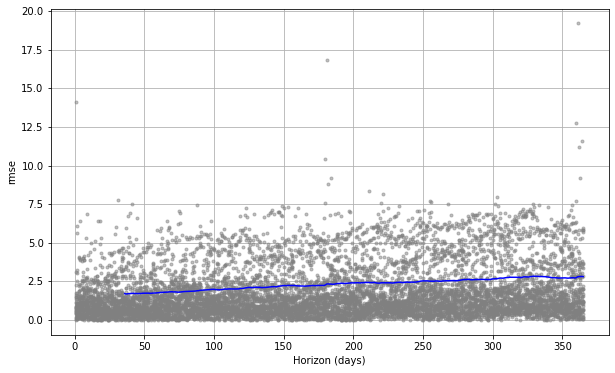

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')